In [1]:
# in this notebook, I will try to fit a model relating the mean behavior of L4, L2/3, SST and VIP cells

In [9]:
# load the data

In [2]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from autograd import elementwise_grad as egrad
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

ModuleNotFoundError: No module named 'autograd'

In [5]:
    def compute_tuning(dsfile):
        with h5py.File(dsfile,mode='r') as f:
            keylist = [key for key in f.keys()]
            tuning = [None]*len(keylist)
            uparam = [None]*len(keylist)
            for ikey in range(len(keylist)):
#             try:
                session = f[keylist[ikey]]
                print(session)
#                 print([key for key in session.keys()])
                if 'size_contrast_0' in session:
                    sc0 = session['size_contrast_0']
                    data = sc0['decon'][:]
                    stim_id = sc0['stimulus_id'][:]
                    nbefore = sc0['nbefore'][()]
                    nafter = sc0['nafter'][()]
                    trialrun = sc0['running_speed_cm_s'][:,nbefore:-nafter].mean(-1)>10 #
                    print(sc0['running_speed_cm_s'].shape)
                    print(np.nanmean(trialrun))
                    if np.nanmean(trialrun)>0.4:
                        tuning[ikey] = ut.compute_tuning(data,stim_id,trial_criteria=trialrun)[:]
                    for param in sc0['stimulus_parameters']:
                        uparam[ikey] = sc0[param][:]
    #             except:
    #                 print('could not do '+keylist[ikey])
        return tuning,uparam

In [6]:
dsname_pc = '/home/mossing/Documents/notebooks/shared_data/pyr_l23_data_struct.hdf5'
tuning_pc,uparam_pc = compute_tuning(dsname_pc)

<HDF5 group "/session_181205_M10130" (7 members)>
(1400, 31)
0.26785714285714285
<HDF5 group "/session_181209_M8536" (8 members)>
(1400, 31)
0.1692857142857143
<HDF5 group "/session_181213_M8536" (7 members)>
(1400, 47)
0.9614285714285714
<HDF5 group "/session_181214_M10130" (7 members)>
(1400, 47)
0.5857142857142857
<HDF5 group "/session_190102_M10130" (7 members)>
(2400, 47)
0.5508333333333333
<HDF5 group "/session_190128_M8982" (8 members)>
(1440, 47)
0.05277777777777778
<HDF5 group "/session_190130_M9667" (8 members)>
(1440, 47)
0.8097222222222222
<HDF5 group "/session_190131_M9355" (8 members)>
(1440, 47)
0.06597222222222222
<HDF5 group "/session_190208_M9355" (8 members)>
(1440, 47)
0.049305555555555554
<HDF5 group "/session_190212_M8536" (8 members)>
(1440, 47)
0.7534722222222222


/home/mossing/Documents/code/adesnal/pyute.py:916: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


In [7]:
dsname_sst = '/home/mossing/Documents/notebooks/shared_data/sst_l23_data_struct.hdf5'
tuning_sst,uparam_sst = compute_tuning(dsname_sst)

<HDF5 group "/session_180713_M9053" (9 members)>
(1200, 31)
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
(1200, 31)
0.8441666666666666
<HDF5 group "/session_180802_M9053" (8 members)>
(1200, 31)
0.5083333333333333
<HDF5 group "/session_180821_M9417" (9 members)>
(1200, 31)
0.1475
<HDF5 group "/session_181117_M10039" (9 members)>
(1400, 31)
0.21071428571428572
<HDF5 group "/session_181120_M10039" (8 members)>
(1400, 31)
0.14285714285714285
<HDF5 group "/session_181121_M10039" (8 members)>
(1400, 31)
0.06142857142857143


In [8]:
dsname_vip = '/home/mossing/Documents/notebooks/shared_data/vip_l23_data_struct.hdf5'
tuning_vip,uparam_vip = compute_tuning(dsname_vip)

<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
(1000, 31)
0.989
<HDF5 group "/session_180516_M8956" (9 members)>
(1200, 31)
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
(1200, 31)
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
(1200, 31)
0.6616666666666666
<HDF5 group "/session_180531_M8961" (9 members)>
(1200, 31)
0.6375
<HDF5 group "/session_180618_M8956" (9 members)>
(720, 31)
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
(1200, 31)
0.009166666666666667
<HDF5 group "/session_180720_M8961" (8 members)>
(1200, 31)
0.04583333333333333
<HDF5 group "/session_180903_M8961" (9 members)>
(1200, 31)
0.8341666666666666


In [10]:
def average_up(arr):
    return arr[:,:,:,:,8:-8].mean(-1).mean(-1) #.reshape((arr.shape[0],-1))

In [119]:
def columnize(arr):
    output = np.nanmean(arr,0).flatten()
    output = output/np.nanmax(output)
    return output

In [12]:
[[x for x in [r for r in tuning_vip if not r is None]][i] for i in [1,2,3,4,6]]

[array([[[[[7.05669655e-01, 9.65150051e-01, 7.01781001e-01, ...,
            3.84703967e-01, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 2.40275249e-01, 0.00000000e+00, ...,
            4.12124691e-01, 4.47119054e-01, 5.64581635e-02],
           [0.00000000e+00, 2.32739374e-01, 1.41728204e-01, ...,
            1.77187852e-01, 0.00000000e+00, 0.00000000e+00],
           ...,
           [0.00000000e+00, 0.00000000e+00, 3.04624807e-01, ...,
            5.89458441e-02, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 6.09178654e-02, 6.91618613e-01, ...,
            3.46405992e-01, 1.60132722e-01, 7.65442529e-02],
           [3.16598603e-01, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
          [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            1.17445958e-01, 0.00000000e+00, 0.00000000e+00],
           [0.00000000e+00, 0.00000000e+00, 1.57256338e-02, ...,
            1.11771335e-01, 3.1698

In [13]:
[x.shape for x in [r for r in tuning_sst if not r is None]]

[(212, 5, 6, 8, 20), (300, 5, 6, 8, 20), (130, 5, 6, 8, 20)]

In [14]:
rpc = average_up(np.concatenate([x[:,:5,[0,-5,-4,-3,-2,-1]] for x in [r for r in tuning_pc if not r is None]],axis=0))
rsst = average_up(np.concatenate([x for x in [r for r in tuning_sst if not r is None]],axis=0))
rvip = average_up(np.concatenate([[x for x in [r for r in tuning_vip if not r is None]][i] for i in [1,2,3,4,6]],axis=0))

In [15]:
n_clusters = 2
R = rpc.reshape((rpc.shape[0],-1))
R = R/np.nanmax(R,axis=1)[:,np.newaxis]
gd = ~np.isnan(R[:,0])
km = sklearn.cluster.KMeans(n_clusters=n_clusters).fit(R[gd])

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


<IPython.core.display.Javascript object>


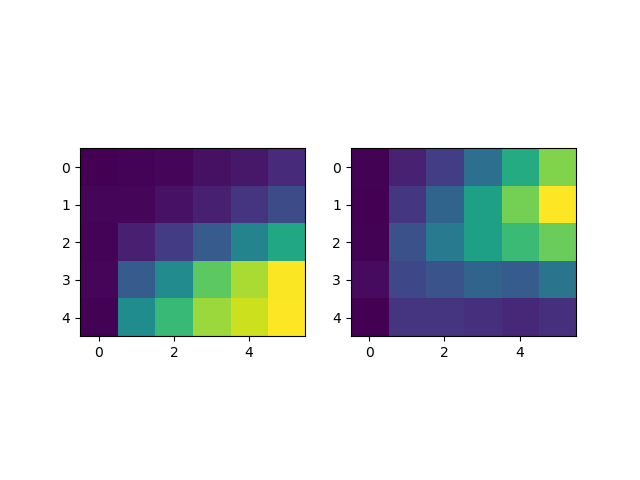

3265
3050


In [16]:
plt.figure()
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    plt.imshow(rpc[gd][km.labels_==i].mean(0))
    print((km.labels_==i).sum())

In [17]:
ontarget = np.zeros((rpc.shape[0],),dtype='bool')
ontarget[gd] = km.labels_==1
offtarget = np.zeros((rpc.shape[0],),dtype='bool')
offtarget[gd] = km.labels_==0

In [18]:
n_clusters = 3
R = rvip.reshape((rvip.shape[0],-1))
R = R/np.nanmax(R,axis=1)[:,np.newaxis]
gd = ~np.isnan(R.sum(1))
km = sklearn.cluster.KMeans(n_clusters=n_clusters).fit(R[gd])

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


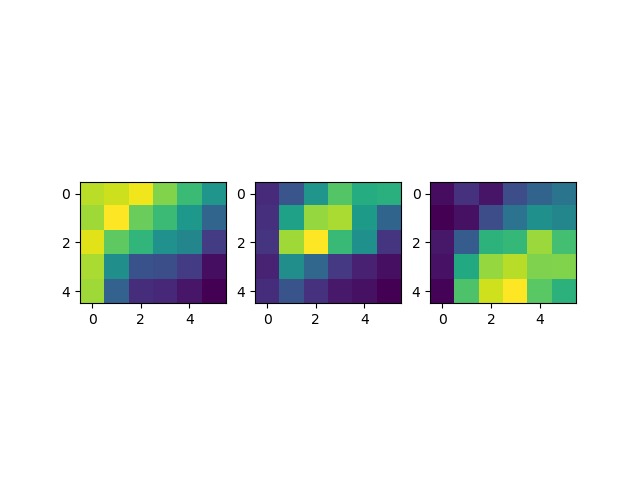

229
217
327


In [19]:
plt.figure()
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    plt.imshow(rvip[gd][km.labels_==i].mean(0))
    print((km.labels_==i).sum())

In [20]:
facilitated = np.zeros((rvip.shape[0],),dtype='bool')
facilitated[gd] = km.labels_==2
suppressed = np.zeros((rvip.shape[0],),dtype='bool')
suppressed[gd] = km.labels_==0
bandpass = np.zeros((rvip.shape[0],),dtype='bool')
bandpass[gd] = km.labels_==1

<IPython.core.display.Javascript object>


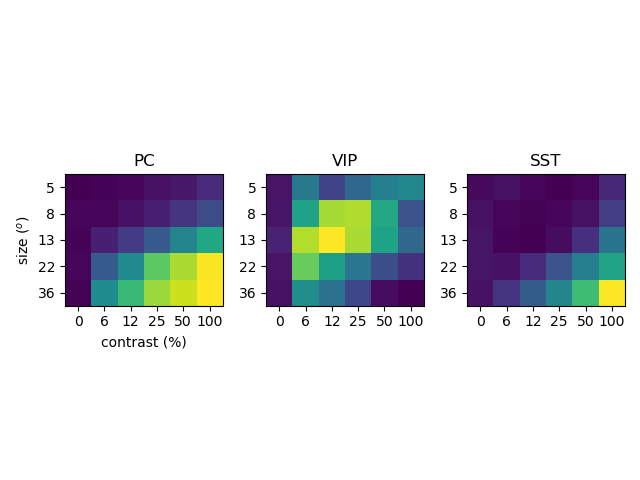

([<matplotlib.axis.YTick at 0x7fbb84857d68>,
 <a list of 5 Text yticklabel objects>)

In [21]:
ucontrast = [str(c) for c in np.array((0,6,12,25,50,100))]
usize = [str(s) for s in (5,8,13,22,36)]
plt.figure()
plt.subplot(1,3,1)
plt.imshow(rpc[offtarget].mean(0))
plt.title('PC')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.xlabel('contrast (%)')
plt.ylabel('size ($^o$)')
plt.subplot(1,3,2)
plt.imshow(np.nanmean(rvip,0))
plt.title('VIP')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
plt.subplot(1,3,3)
plt.imshow(np.nanmean(rsst,0))
plt.tight_layout()
plt.title('SST')
plt.xticks(np.arange(6),ucontrast)
plt.yticks(np.arange(5),usize)
# plt.savefig('figures/size_contrast_array.pdf')

<IPython.core.display.Javascript object>


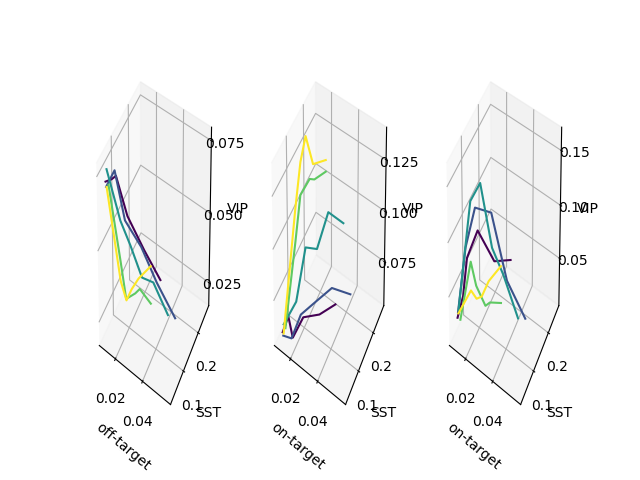

Text(0.5, 0, 'VIP')

In [22]:
fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
colors = plt.cm.viridis(np.linspace(0,1,5))
for i in range(rpc.shape[1]):
    ax.plot(np.nanmean(rpc[ontarget],0)[i],np.nanmean(rsst,0)[i],np.nanmean(rvip[suppressed],0)[i],c=colors[i])
#ax.scatter(rpc.mean(0),rvip.mean(0),ym_sst)
#ax.scatter(rpc.mean(0),ym_vip,rsst.mean(0))
ax.set_xlabel('off-target')
ax.set_ylabel('SST')
ax.set_zlabel('VIP')

ax = fig.add_subplot(132, projection='3d')
colors = plt.cm.viridis(np.linspace(0,1,5))
for i in range(rpc.shape[1]):
    ax.plot(np.nanmean(rpc[ontarget],0)[i],np.nanmean(rsst,0)[i],np.nanmean(rvip[facilitated],0)[i],c=colors[i])
#ax.scatter(rpc.mean(0),rvip.mean(0),ym_sst)
#ax.scatter(rpc.mean(0),ym_vip,rsst.mean(0))
ax.set_xlabel('on-target')
ax.set_ylabel('SST')
ax.set_zlabel('VIP')

ax = fig.add_subplot(133, projection='3d')
colors = plt.cm.viridis(np.linspace(0,1,5))
for i in range(rpc.shape[1]):
    ax.plot(np.nanmean(rpc[ontarget],0)[i],np.nanmean(rsst,0)[i],np.nanmean(rvip[bandpass],0)[i],c=colors[i])
#ax.scatter(rpc.mean(0),rvip.mean(0),ym_sst)
#ax.scatter(rpc.mean(0),ym_vip,rsst.mean(0))
ax.set_xlabel('on-target')
ax.set_ylabel('SST')
ax.set_zlabel('VIP')

In [910]:
ut.mkdir('figures')
plt.savefig('figures/r3d.pdf')

In [24]:
def fit_w(X,y,f,w0=None,bounds=None):
    # X is (N,P), y is (N,). Finds w: (P,) weight matrix to explain y as y = f(Xw)
    # f is a static nonlinearity, given as a function
    def minusL(w):
        return 0.5*np.sum((f(X.dot(w))-y)**2)
    def minusdLdw(w): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(w)
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    wstar = sop.fmin_l_bfgs_b(minusL,w0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
    return wstar

In [25]:
def linearize(f,u0):
    # return a function that evaluates the Taylor expansion of f about u0
    return lambda u: f(u0) + egrad(f)(u0)*(u-u0)

def linearize_invert(f,u0):
    # return a function that evaluates the Taylor expansion of f about u0
    return lambda v: u0 + (v-f(u0))/egrad(f)(u0)

In [41]:
wstar[1]

0.842616807695404

In [42]:
X = [columnize(arr)[:,np.newaxis] for arr in (rpc,rsst)]
X = np.concatenate(X,axis=1)
X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
nroi = rvip.shape[0]
wvip = np.zeros((nroi,3))
sqerror_vip = np.zeros((nroi,))
for ind in range(nroi):
    print(str(ind) + '/' + str(nroi))
    y = columnize(rvip[ind:ind+1])
    f = lambda x: (x>0)*x**2
    w0 = np.array((1,-1,1))
    wstar = fit_w(X,y,f,w0=w0,bounds=None)
    wvip[ind] = wstar[0]
    sqerror_vip[ind] = wstar[1]
#     ym = f(X.dot(w))

0/1139
1/1139
2/1139
3/1139
4/1139
5/1139
6/1139
7/1139
8/1139
9/1139
10/1139
11/1139
12/1139
13/1139
14/1139
15/1139
16/1139
17/1139
18/1139
19/1139
20/1139
21/1139
22/1139
23/1139
24/1139
25/1139
26/1139
27/1139
28/1139
29/1139
30/1139
31/1139
32/1139
33/1139
34/1139
35/1139
36/1139
37/1139
38/1139
39/1139
40/1139
41/1139
42/1139
43/1139
44/1139
45/1139
46/1139
47/1139
48/1139
49/1139
50/1139
51/1139
52/1139
53/1139
54/1139
55/1139
56/1139
57/1139
58/1139
59/1139
60/1139
61/1139
62/1139
63/1139
64/1139
65/1139
66/1139
67/1139
68/1139
69/1139
70/1139
71/1139
72/1139
73/1139
74/1139
75/1139
76/1139
77/1139
78/1139
79/1139
80/1139
81/1139
82/1139
83/1139
84/1139
85/1139
86/1139
87/1139
88/1139
89/1139
90/1139
91/1139
92/1139
93/1139
94/1139
95/1139
96/1139
97/1139
98/1139
99/1139
100/1139
101/1139
102/1139
103/1139
104/1139
105/1139
106/1139
107/1139
108/1139
109/1139
110/1139
111/1139
112/1139
113/1139
114/1139
115/1139
116/1139
117/1139
118/1139
119/1139
120/1139
121/1139
122/1139
123

924/1139
925/1139
926/1139
927/1139
928/1139
929/1139
930/1139
931/1139
932/1139
933/1139
934/1139
935/1139


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


936/1139
937/1139
938/1139
939/1139
940/1139
941/1139
942/1139
943/1139
944/1139
945/1139
946/1139
947/1139
948/1139
949/1139
950/1139
951/1139
952/1139
953/1139
954/1139
955/1139
956/1139
957/1139
958/1139
959/1139
960/1139
961/1139
962/1139
963/1139
964/1139
965/1139
966/1139
967/1139
968/1139
969/1139
970/1139
971/1139
972/1139
973/1139
974/1139
975/1139
976/1139
977/1139
978/1139
979/1139
980/1139
981/1139
982/1139
983/1139
984/1139
985/1139
986/1139
987/1139
988/1139
989/1139
990/1139
991/1139
992/1139
993/1139
994/1139
995/1139
996/1139
997/1139
998/1139
999/1139
1000/1139
1001/1139
1002/1139
1003/1139
1004/1139
1005/1139
1006/1139
1007/1139
1008/1139
1009/1139
1010/1139
1011/1139
1012/1139
1013/1139
1014/1139
1015/1139
1016/1139
1017/1139
1018/1139
1019/1139
1020/1139
1021/1139
1022/1139
1023/1139
1024/1139
1025/1139
1026/1139
1027/1139
1028/1139
1029/1139
1030/1139
1031/1139
1032/1139
1033/1139
1034/1139
1035/1139
1036/1139
1037/1139
1038/1139
1039/1139
1040/1139
1041/1139
1042

<IPython.core.display.Javascript object>


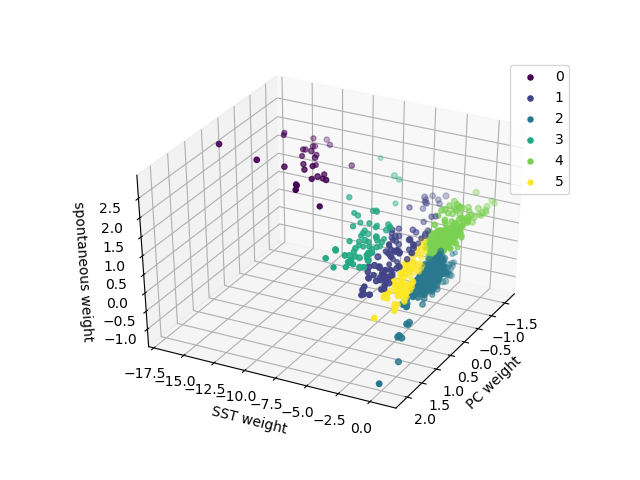

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<IPython.core.display.Javascript object>


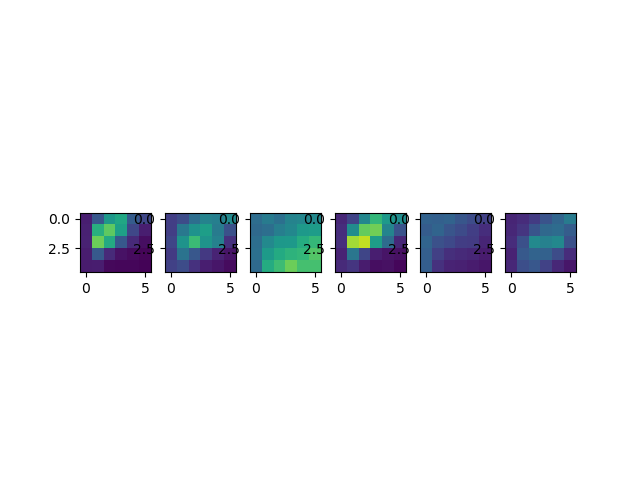

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


In [100]:
fig = plt.figure()
n_clusters = 6
colors = plt.cm.viridis(np.linspace(0,1,n_clusters))
km = sklearn.cluster.KMeans(n_clusters=n_clusters).fit(wvip)
lbl = km.labels_
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    ax.scatter(wvip[lbl==i,0],wvip[lbl==i,1],wvip[lbl==i,2],s=20/np.e*np.exp(1-sqerror_vip[lbl==i]),c=colors[i],label=str(i))
plt.legend()#[str(x) for x in range(n_clusters)])
ax.set_xlabel('PC weight')
ax.set_ylabel('SST weight')
ax.set_zlabel('spontaneous weight')

plt.figure()
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    plt.imshow(np.nanmean(rvip[np.logical_and(lbl==i,sqerror_vip < 0.5)],0),vmin=0,vmax=1*0.25)

In [102]:
u,s,v = np.linalg.svd(wvip)

In [120]:
y_vip = np.concatenate([columnize(x[np.newaxis])[np.newaxis] for x in rvip],axis=0)

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
rvip

(1139, 30)

In [121]:
u,s,v = np.linalg.svd(y_vip)

LinAlgError: SVD did not converge

In [94]:
np.concatenate([[np.ones_like(x) for x in [r for r in tuning_vip if not r is None]][i] for i in [1,2,3,4,6]],axis=0)

(1139, 5, 6)

<IPython.core.display.Javascript object>


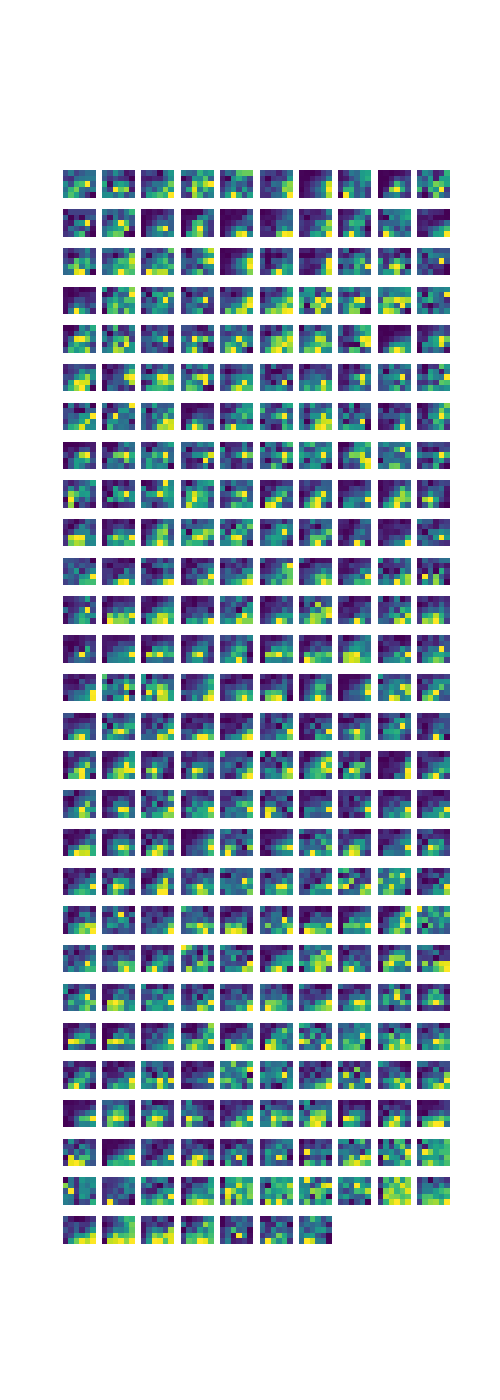

In [96]:
ut.imshow_in_rows(rvip[lbl==3])

<IPython.core.display.Javascript object>


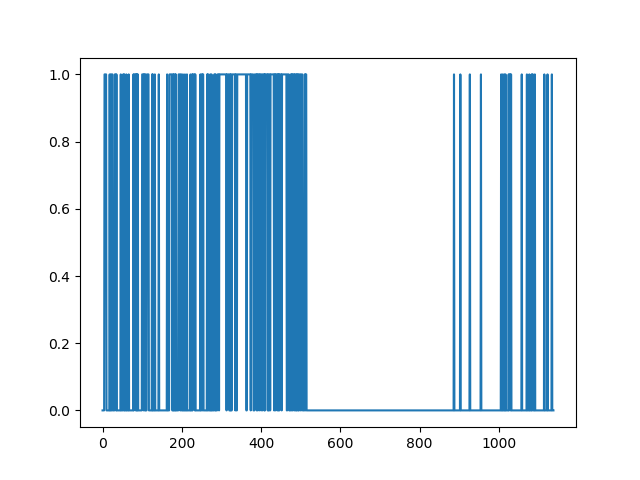

In [93]:
plt.figure()
plt.plot(lbl==3)

In [91]:
wvip.shape

(1139, 3)

In [74]:
X = [columnize(arr)[:,np.newaxis] for arr in (rpc[ontarget],rpc[offtarget],rvip)]
X = np.concatenate(X,axis=1)
X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
nroi = rsst.shape[0]
wsst = np.zeros((nroi,X.shape[1]))
sqerror_sst = np.zeros((nroi,))
for ind in range(nroi):
    print(str(ind) + '/' + str(nroi))
    y = columnize(rsst[ind:ind+1])
    f = lambda x: (x>0)*x**2
    w0 = np.array((1,1,-1,1))
    wstar = fit_w(X,y,f,w0=w0,bounds=None)
    wsst[ind] = wstar[0]
    sqerror_sst[ind] = wstar[1]
#     ym = f(X.dot(w))

0/642
1/642
2/642
3/642
4/642
5/642
6/642
7/642
8/642
9/642
10/642
11/642
12/642
13/642
14/642
15/642
16/642
17/642
18/642
19/642
20/642
21/642
22/642
23/642
24/642
25/642
26/642
27/642
28/642
29/642
30/642
31/642
32/642
33/642
34/642
35/642
36/642
37/642
38/642
39/642
40/642
41/642
42/642
43/642
44/642
45/642
46/642
47/642
48/642
49/642
50/642
51/642
52/642
53/642
54/642
55/642
56/642
57/642
58/642
59/642
60/642
61/642
62/642
63/642
64/642
65/642
66/642
67/642
68/642
69/642
70/642
71/642
72/642
73/642
74/642
75/642
76/642
77/642
78/642
79/642
80/642
81/642
82/642
83/642
84/642
85/642
86/642
87/642
88/642
89/642
90/642
91/642
92/642
93/642
94/642
95/642
96/642
97/642
98/642
99/642
100/642
101/642
102/642
103/642
104/642
105/642
106/642
107/642
108/642
109/642
110/642
111/642
112/642
113/642
114/642
115/642
116/642
117/642
118/642
119/642
120/642
121/642
122/642
123/642
124/642
125/642
126/642
127/642
128/642
129/642
130/642
131/642
132/642
133/642
134/642
135/642
136/642
137/642
138/64

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


390/642
391/642
392/642
393/642
394/642
395/642
396/642
397/642
398/642
399/642
400/642
401/642
402/642
403/642
404/642
405/642
406/642
407/642
408/642
409/642
410/642
411/642
412/642
413/642
414/642
415/642
416/642
417/642
418/642
419/642
420/642
421/642
422/642
423/642
424/642
425/642
426/642
427/642
428/642
429/642
430/642
431/642
432/642
433/642
434/642
435/642
436/642
437/642
438/642
439/642
440/642
441/642
442/642
443/642
444/642
445/642
446/642
447/642
448/642
449/642
450/642
451/642
452/642
453/642
454/642
455/642
456/642
457/642
458/642
459/642
460/642
461/642
462/642
463/642
464/642
465/642
466/642
467/642
468/642
469/642
470/642
471/642
472/642
473/642
474/642
475/642
476/642
477/642
478/642
479/642
480/642
481/642
482/642
483/642
484/642
485/642
486/642
487/642
488/642
489/642
490/642
491/642
492/642
493/642
494/642
495/642
496/642
497/642
498/642
499/642
500/642
501/642
502/642
503/642
504/642
505/642
506/642
507/642
508/642
509/642
510/642
511/642
512/642
513/642
514/642


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


536/642
537/642
538/642
539/642
540/642
541/642
542/642
543/642
544/642
545/642
546/642
547/642
548/642
549/642
550/642
551/642
552/642
553/642
554/642
555/642
556/642
557/642
558/642
559/642
560/642
561/642
562/642
563/642
564/642
565/642
566/642
567/642
568/642
569/642
570/642
571/642
572/642
573/642
574/642
575/642
576/642
577/642
578/642
579/642
580/642
581/642
582/642
583/642
584/642
585/642
586/642
587/642
588/642
589/642
590/642
591/642
592/642
593/642
594/642
595/642
596/642
597/642
598/642
599/642
600/642
601/642
602/642
603/642
604/642
605/642
606/642
607/642
608/642
609/642
610/642
611/642
612/642
613/642
614/642
615/642
616/642
617/642
618/642
619/642
620/642
621/642
622/642
623/642
624/642
625/642
626/642
627/642
628/642
629/642
630/642
631/642
632/642
633/642
634/642
635/642
636/642
637/642
638/642
639/642
640/642
641/642


<IPython.core.display.Javascript object>


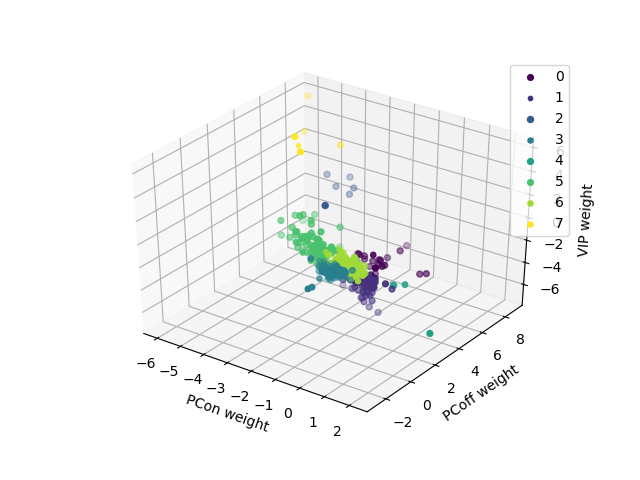

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<IPython.core.display.Javascript object>


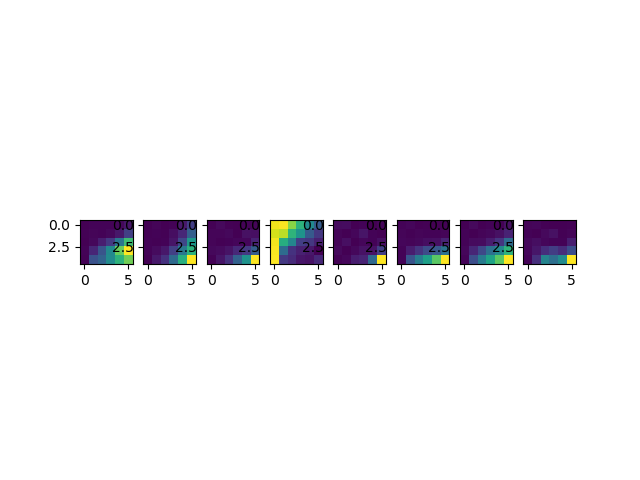

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


In [87]:
fig = plt.figure()
n_clusters = 8
colors = plt.cm.viridis(np.linspace(0,1,n_clusters))
km = sklearn.cluster.KMeans(n_clusters=n_clusters).fit(wsst)
lbl = km.labels_
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    ax.scatter(wsst[lbl==i,0],wsst[lbl==i,1],wsst[lbl==i,2],s=20/np.e*np.exp(1-sqerror_sst[lbl==i]),c=colors[i],label=str(i))
plt.legend()#[str(x) for x in range(n_clusters)])
ax.set_xlabel('PCon weight')
ax.set_ylabel('PCoff weight')
ax.set_zlabel('VIP weight')

plt.figure()
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    plt.imshow(np.nanmean(rsst[np.logical_and(lbl==i,sqerror_sst < 0.5)],0))

<IPython.core.display.Javascript object>


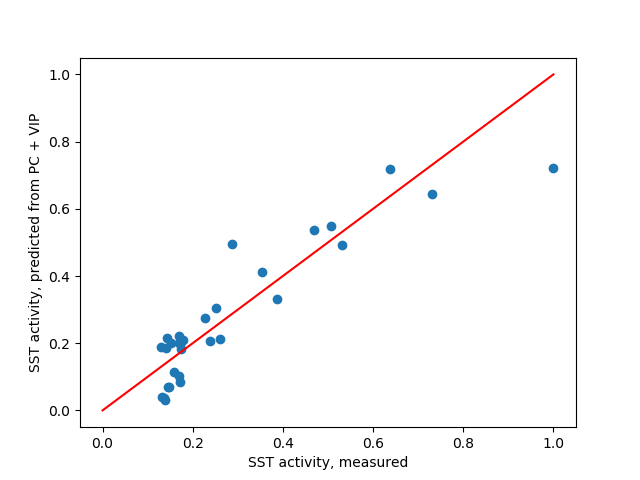

In [981]:
plt.figure()
plt.scatter(y_sst,ym_sst)
plt.plot((0,1),(0,1),c='r')
plt.xlabel('SST activity, measured')
plt.ylabel('SST activity, predicted from PC + VIP')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.savefig('figures/sst_measured_modeled.pdf')

In [936]:
X_vip = [columnize(arr)[:,np.newaxis] for arr in (rpc,rsst)]
X_vip = np.concatenate(X_vip,axis=1)
X_vip = np.concatenate((X_vip,np.ones((X_vip.shape[0],1))),axis=1)
y_vip = columnize(rvip)
f = lambda x: (x>0)*x**2
w0 = np.array((1,-1,10))
wstar = fit_w(X_vip,y_vip,f,w0=w0,bounds=None)
wvip = wstar[0]
ym_vip = f(X_vip.dot(wvip))

In [937]:
wstar

(array([ 0.3486    , -0.68526289,  0.78300569]),
 0.2751125006838375,
 {'grad': array([-5.59224105e-06, -8.44784698e-07, -9.33281758e-06]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 46,
  'nit': 33,
  'warnflag': 0})

<IPython.core.display.Javascript object>


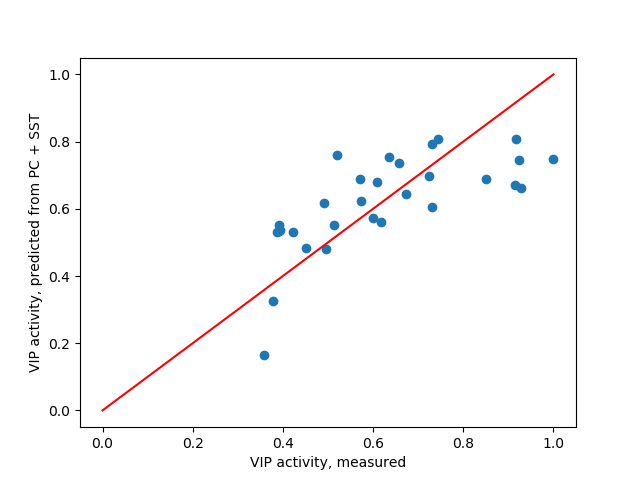

In [982]:
plt.figure()
plt.scatter(y_vip,ym_vip)
plt.plot((0,1),(0,1),c='r')
plt.xlabel('VIP activity, measured')
plt.ylabel('VIP activity, predicted from PC + SST')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.savefig('figures/vip_measured_modeled.pdf')

In [ ]:
# find ML columns of wx,wy one by one from data: Ydata ~ Y = f(Xwx + Ywy)
# 1. linearize around Y = f(Xwx + Ywy) and find new ML wx,xy
# 2. solve Y = f(Xwx + Ywy) exactly for fixed wx,wy
# repeat from 1.

In [946]:
def compute_Y_nonlinear(X,Wx,Wy,f,Y0=None,bounds=None):
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    
#     def parse_W(W): 
#         Wx = W[:nP*nQ].reshape((nP,nQ))
#         Wy = W[nP*nQ:].reshape((nQ,nQ))
#         return Wx,Wy
    
    def parse_Y(Y):
        return Y.reshape((nN,nQ))

    
#     Wx,Wy = parse_W(W)
    nN,nQ = Y0.shape
    
    Ystar = [None]*nN
    
    for i in range(nN):
        def minusL(y):
            return 0.5*np.sum((f(X[i] @ Wx + y @ Wy) - y)**2)

        def minusdLdw(y):
            return egrad(minusL)(y)
        
        Ystar[i] = sop.fmin_l_bfgs_b(minusL,Y0[i],fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
    return np.array([el[0] for el in Ystar])

In [947]:
def fit_W_linearized(X,Y,f,Y0=None,W0x=None,W0y=None,bounds=None):
    # X is (N,P), y is (N,Q). Finds wx, wy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwx + Ywy)
    # f is a static nonlinearity, given as a function
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    
    fprime = egrad(f)
    nP = X.shape[1]
    nQ = Y.shape[1]
    nN = X.shape[0]
    assert(nN==Y.shape[0])
    
    #W0x,W0y = parse_W(W0)
    
    u_fn = lambda Wx,Wy: X @ Wx + Y0 @ Wy
    
    u0 = u_fn(W0x,W0y)
    Fsquiggle = f(u0)
    Fprimesquiggle = np.maximum(fprime(u0),fudge)
    A0 = -u0 - (Y0 @ W0y) + Fsquiggle/Fprimesquiggle
    
    W0 = np.concatenate((W0x.flatten(),W0y.flatten()),axis=0)
    
    def compute_Y(Wx,Wy):
        # taking advantage of numpy broadcasting rules
        Phi = np.zeros((nN,nQ,nQ))
        for i in range(nN):
            np.fill_diagonal(Phi[i],1/Fprimesquiggle[i]) # is there a cleaner way?
        A1 = u_fn(Wx,Wy)
        A = A0 + A1 # (N,Q)
        Y = (A @ np.linalg.inv(Phi-W0y))[np.eye(nN,dtype='bool')]
#         Y = np.zeros((nN,nQ))
#         for i in range(nN):
#             Y[i] = A[i] @ np.linalg.inv(Phi[i]-W0y) # (Q,) @ (Q,Q).
#         assert(True==False)
        return Y
    
    def minusL(W):
        Wx,Wy = parse_W(W)
        return 0.5*np.sum((compute_Y(Wx,Wy) - Y)**2)
    
    def minusdLdw(W): 
        # sum in first dimension: (N,1) times (N,1) times (N,P)
        return egrad(minusL)(W)
    
    Wstar = sop.fmin_l_bfgs_b(minusL,W0,fprime=minusdLdw,bounds=bounds,pgtol=pgtol,factr=factr,epsilon=epsilon)
    
#     assert(True==False)
    
    return Wstar

In [948]:
u_fn = lambda Wx,Wy: X @ Wx + Y @ Wy

In [949]:
W0y = np.array(((0,wsst[1]),(wvip[1],0)))
W0x = np.concatenate((wsst[[0,2],np.newaxis],wvip[[0,2],np.newaxis]),axis=1)
Y = np.concatenate((y_sst[:,np.newaxis],y_vip[:,np.newaxis]),axis=1)
X = columnize(rpc)[:,np.newaxis]
X = np.concatenate((X,np.ones_like(X)),axis=1)

In [950]:
Y0 = compute_Y_nonlinear(X,W0x,W0y,f,Y0=Y)

<IPython.core.display.Javascript object>


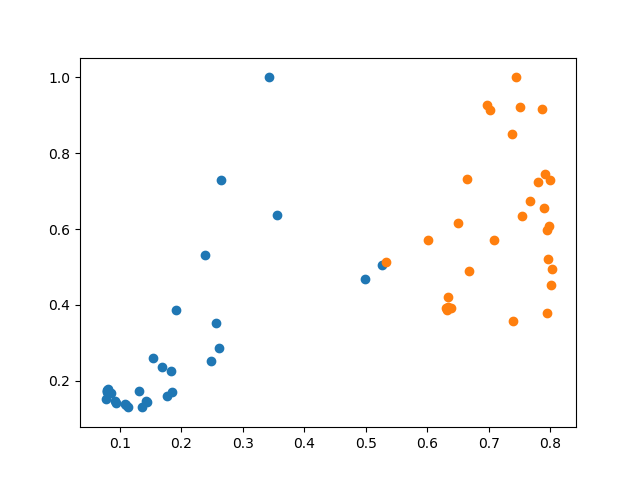

In [951]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y0[:,i],Y[:,i])
# plt.plot(Y.flatten(),Y.flatten())

In [952]:
nP = X.shape[1]
nQ = Y.shape[1]
def parse_W(W):
    Wx = W[:nP*nQ].reshape((nP,nQ))
    Wy = W[nP*nQ:].reshape((nQ,nQ))
    return Wx,Wy

In [953]:
np.maximum(u_fn(Wx,Wy),1e-2)

array([[0.26670226, 0.64334211],
       [0.05876066, 0.64873992],
       [0.21499509, 0.69475889],
       [0.18739103, 0.74893862],
       [0.19223036, 0.79454977],
       [0.23955621, 0.77712964],
       [0.26717069, 0.63057249],
       [0.01      , 0.68551326],
       [0.01      , 0.73520969],
       [0.01      , 0.78806327],
       [0.15382064, 0.83113599],
       [0.46399444, 0.79119844],
       [0.23877137, 0.62569194],
       [0.01      , 0.72923079],
       [0.01      , 0.79194319],
       [0.01      , 0.83050551],
       [0.23798143, 0.81499666],
       [0.47289777, 0.68023555],
       [0.27722642, 0.62806517],
       [0.01      , 0.74725176],
       [0.14769516, 0.7488012 ],
       [0.37056894, 0.73042892],
       [0.50251719, 0.62218645],
       [0.62897089, 0.55720048],
       [0.27328456, 0.6252331 ],
       [0.17349284, 0.70851778],
       [0.31252229, 0.64600354],
       [0.47281798, 0.56128251],
       [0.61344865, 0.40051123],
       [0.66708175, 0.18725322]])

In [954]:
Wstar = fit_W_linearized(X,Y,f,Y0=Y,W0y=W0y,W0x=W0x,bounds=None)

In [955]:
Wstar

(array([ 0.14764598,  0.11998847,  0.48570706,  0.56322556,  0.32967227,
        -0.42972828, -0.2092647 ,  0.44713992]),
 0.08142042258931964,
 {'grad': array([ 0.00128981, -0.00190393,  0.00163985, -0.00273476,  0.00015842,
         -0.00047957,  0.00106515, -0.00178789]),
  'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  'funcalls': 144,
  'nit': 122,
  'warnflag': 0})

In [956]:
W1x,W1y = parse_W(Wstar[0])

In [957]:
Y1 = compute_Y_nonlinear(X,W1x,W1y,f,Y0=Y0)

<IPython.core.display.Javascript object>


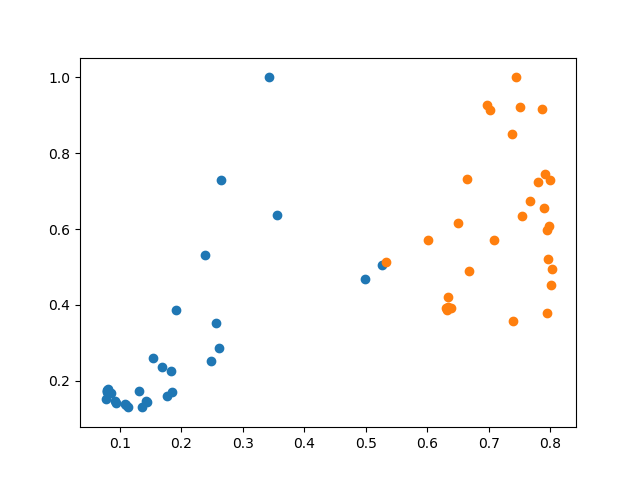

In [958]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y0[:,i],Y[:,i])

<IPython.core.display.Javascript object>


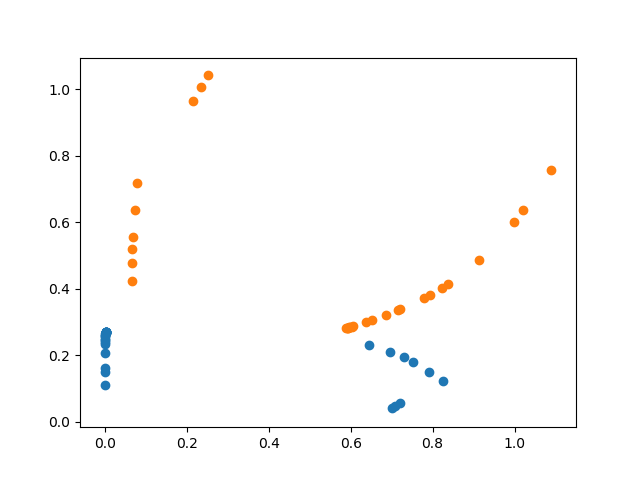

In [735]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y0[:,i],Y1[:,i])

<IPython.core.display.Javascript object>


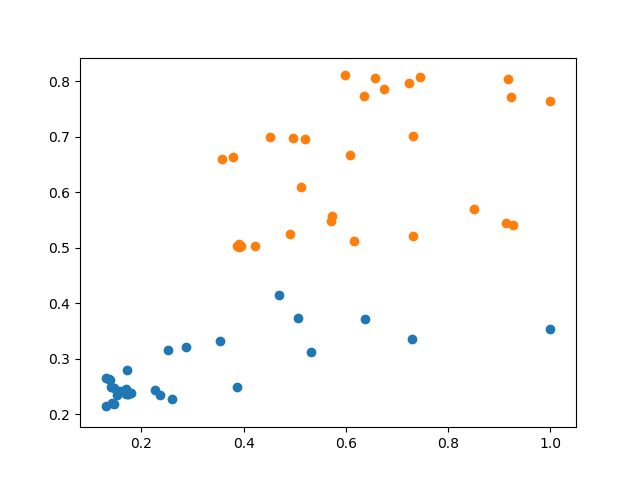

In [959]:
plt.figure()
# plt.scatter(f(X @ Wx + Y @ Wy).flatten(),Y.flatten())
for i in range(Y.shape[1]):
    plt.scatter(Y[:,i],Y1[:,i])

In [968]:
# W0 = np.concatenate((W0x.flatten(),W0y.flatten()))
bounds = [(-np.inf,np.inf)]*8
bounds[4] = (0,0)
bounds[7] = (0,0)
bounds = tuple(bounds)
Niter = 400
w0y = W0y
w0x = W0x
Wstar = [None]*Niter
eta = 0.1
for i in range(Niter):
    Wstar[i] = fit_W_linearized(X,Y,f,Y0=Y,W0y=w0y,W0x=w0x,bounds=bounds)
    w1x,w1y = parse_W(Wstar[i][0])
    w0x = w0x + eta*(w1x-w0x)
    w0y = w0y + eta*(w1y-w0y)

In [969]:
Wt = np.zeros((Niter,)+(Wstar[0][0].shape))
Yt = np.zeros((Niter,)+(Y.shape))
for i in range(Niter):
    Wt[i] = Wstar[i][0]
    wx,wy = parse_W(Wt[i])
    Yt[i] = compute_Y_nonlinear(X,wx,wy,f,Y0=Y)

In [962]:
wy

array([[ 0.        , -0.59221771],
       [-0.96551656,  0.        ]])

<IPython.core.display.Javascript object>


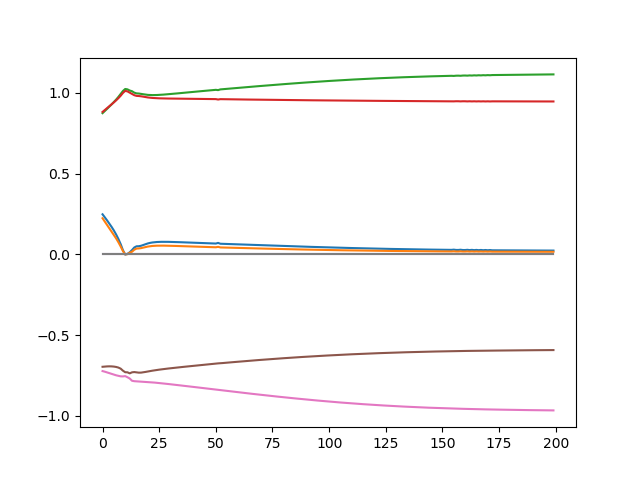

In [967]:
plt.figure()
for i in range(Wt.shape[1]):
    plt.plot(Wt[:,i])

<IPython.core.display.Javascript object>


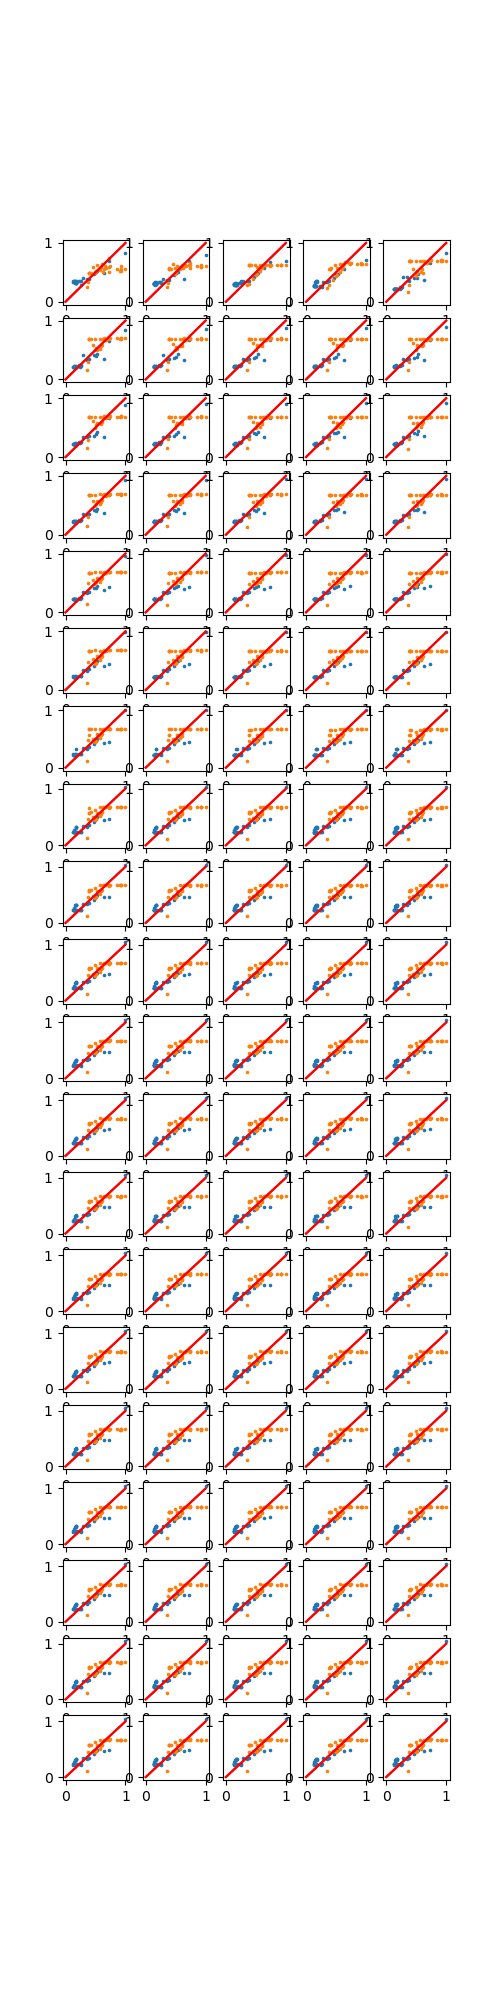

In [975]:
plt.figure(figsize=(5,20))
for i in range(0,Niter,4):
    plt.subplot(20,5,int(i/4)+1)
    for j in range(2):
        plt.scatter(Y[:,j],Yt[i,:,j],s=2.5)
        plt.plot((0,1),(0,1),c='r')

<IPython.core.display.Javascript object>


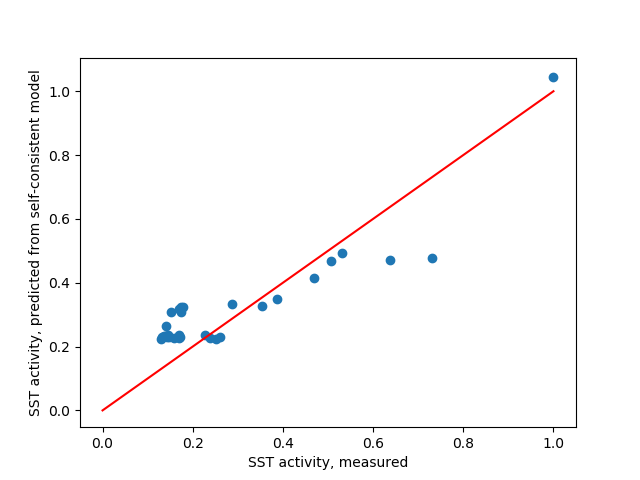

<IPython.core.display.Javascript object>


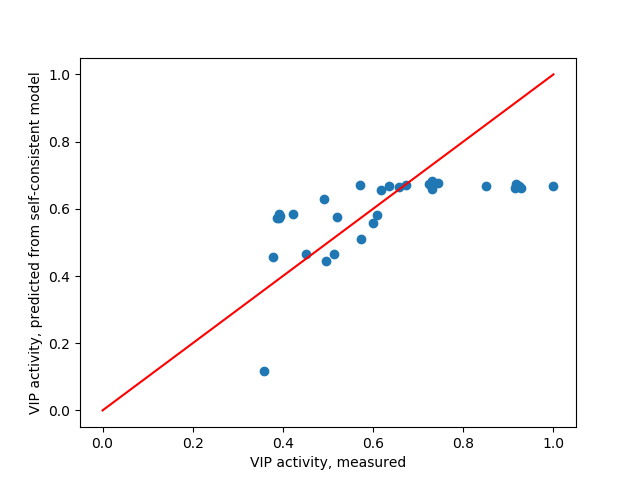

In [983]:
for j in range(2):
    plt.figure()
    plt.scatter(Y[:,j],Yt[-1,:,j])
    plt.plot((0,1),(0,1),c='r')
    plt.xlim((-0.05,1.05))
    if j==0:
        plt.xlabel('SST activity, measured')
        plt.ylabel('SST activity, predicted from self-consistent model')
        plt.savefig('figures/sst_measured_modeled_self_consistent.pdf')
    if j==1:
        plt.xlabel('VIP activity, measured')
        plt.ylabel('VIP activity, predicted from self-consistent model')
        plt.savefig('figures/vip_measured_modeled_self_consistent.pdf')
#     plt.ylim((-0.05,1.05))

<IPython.core.display.Javascript object>


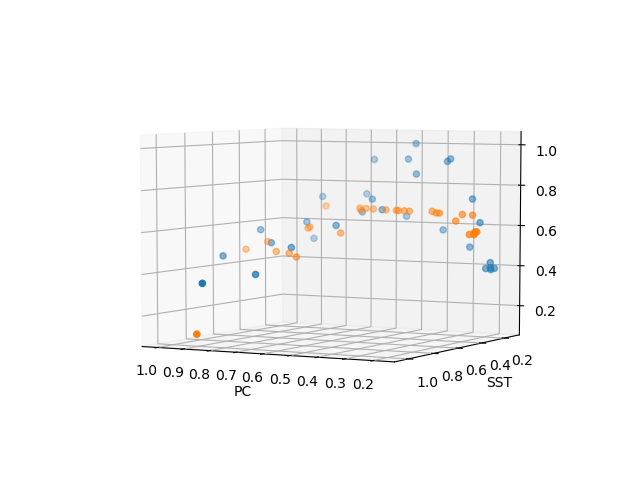

Text(0.5, 0, 'PC')

In [965]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# for i in range(rpc.shape[2]):
#     ax.scatter(rpc.mean(0)[:,i],rvip.mean(0)[:,i],rsst.mean(0)[:,i])
R = np.concatenate((columnize(rpc)[:,np.newaxis],Y),axis=1)
ax.scatter(R[:,0],R[:,1],R[:,2])
Rp = np.concatenate((columnize(rpc)[:,np.newaxis],Yt[-1]),axis=1)
ax.scatter(Rp[:,0],Rp[:,1],Rp[:,2])
plt.ylabel('SST')
plt.xlabel('PC')
# plt.scatter(Yt[4][:,0])

In [832]:
columnize(rpc).shape

(30,)